In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

In [2]:
# Initializing lattice & spins: Create an n x n lattice with random values of +1 or -1
def generate_lattice(n):
    spin_matrices = np.random.choice([-1, 1], size=(3, n, n))
    return spin_matrices

In [3]:
def hamiltonian(spin_matrices, n):
    H = 0
    for i in range(3):
        lattice = spin_matrices[i, :, :]
        for i in range(n):
            for j in range(n):
                H += - J * lattice[i][j] * (lattice[(i-1)%n][j] + lattice[(i+1)%n][j] + lattice[i][(j-1)%n] + lattice[i][(j+1)%n])
    return H*J

In [4]:
def plot_lattice(spin_matrices, figsize=(12, 4)):
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    labels = ['x', 'y', 'z']
    for i in range(3):
        lattice = spin_matrices[i, :, :]
        binary_lattice = (lattice + 1) // 2  # Convert -1 and 1 to 0 and 1
        axes[i].imshow(binary_lattice, cmap="binary", origin="upper")
        axes[i].set_title(f"Spin {labels[i]}")  # Add the label as the title
        axes[i].axis("on")  # Show the axes
    plt.tight_layout()
    plt.show()

In [5]:
def metropolis(spin_matrices, n, b, iter):
    H = hamiltonian(spin_matrices, n)
    H_list = []
    for i in trange(iter):
        if i%1000 == 0: H_list.append(H)

        comp = np.random.choice([0, 1, 2])
        a, b = np.random.randint(0, n), np.random.randint(0, n)
        spin_matrices[comp, a, b] *= -1

        H_new = H - J*2*spin_matrices[comp, a, b]*(spin_matrices[comp, (a-1)%n, b] + 
                spin_matrices[comp, (a+1)%n, b] + spin_matrices[comp, a, (b-1)%n] + spin_matrices[comp, a, (b+1)%n])

        if H_new > H:
            if np.random.rand() > math.exp(-(H_new - H)*b):
                # if iter%1000 == 0: print(H_new - H, math.exp(-(H_new - H)*b))
                spin_matrices[comp, a, b] *= -1
                continue
        H = H_new
    return spin_matrices, list, H_list

In [6]:
iter = 5000000
n = 100
J = 1  # 1: ferro, -1: antiferro
b = 0.5

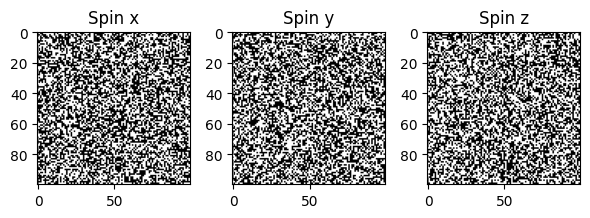

In [7]:
spin_matrices = generate_lattice(n)
plot_lattice(spin_matrices, figsize = (6,3))

In [8]:
spin_matrices_new, list, H_list = metropolis(spin_matrices.copy(), n=n, b=b, iter=iter)
print(H_list)

100%|██████████| 5000000/5000000 [01:14<00:00, 66830.99it/s]

[192, -1296, -2596, -3908, -5084, -6140, -7264, -8340, -9172, -10060, -10832, -11648, -12524, -13244, -14068, -14828, -15480, -16060, -16664, -17192, -17900, -18440, -19044, -19532, -20024, -20512, -20996, -21420, -21828, -22200, -22636, -23064, -23456, -23832, -24160, -24504, -24892, -25304, -25732, -26048, -26400, -26720, -27096, -27444, -27792, -28056, -28332, -28692, -29008, -29316, -29600, -29880, -30104, -30356, -30568, -30820, -31088, -31300, -31564, -31868, -32076, -32268, -32496, -32736, -32924, -33136, -33280, -33452, -33652, -33852, -34068, -34220, -34424, -34564, -34716, -34868, -35004, -35140, -35300, -35452, -35612, -35812, -35944, -36084, -36176, -36332, -36444, -36636, -36732, -36860, -36980, -37116, -37252, -37376, -37488, -37616, -37760, -37912, -38080, -38192, -38228, -38348, -38484, -38620, -38700, -38792, -38872, -38988, -39076, -39168, -39284, -39408, -39520, -39596, -39712, -39828, -39948, -40020, -40124, -40240, -40356, -40468, -40548, -40640, -40732, -40820, -4

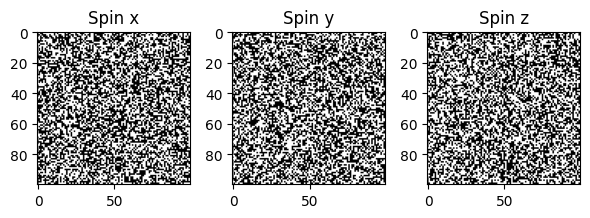

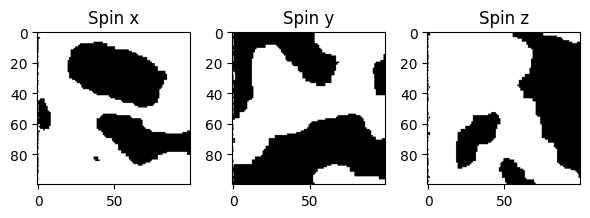

In [9]:
plot_lattice(spin_matrices, figsize=(6,3))
plot_lattice(spin_matrices_new, figsize = (6,3))

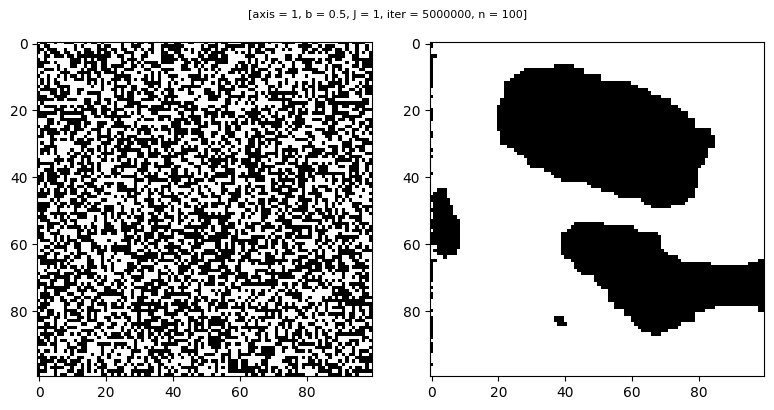

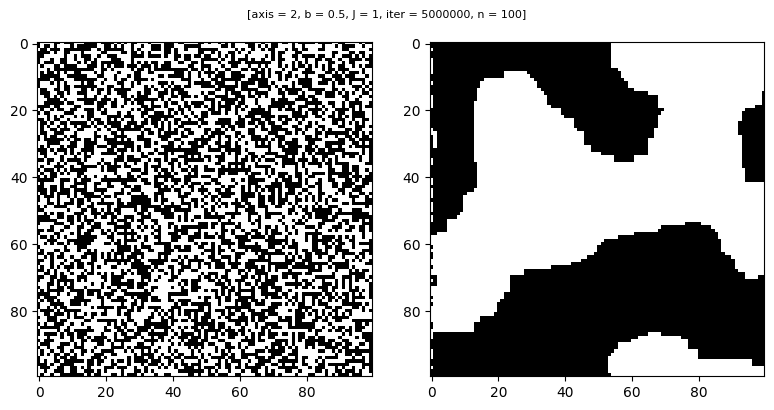

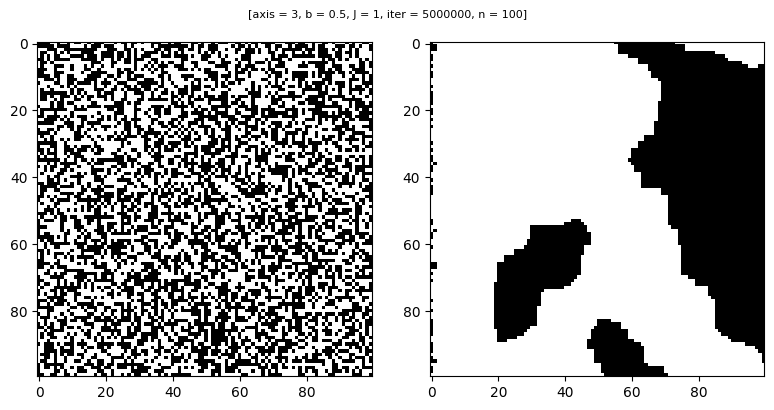

In [10]:
from plotter import plot_3map
plot_3map(spin_matrices, spin_matrices_new, b, J, iter, n, figsize =(8, 4))

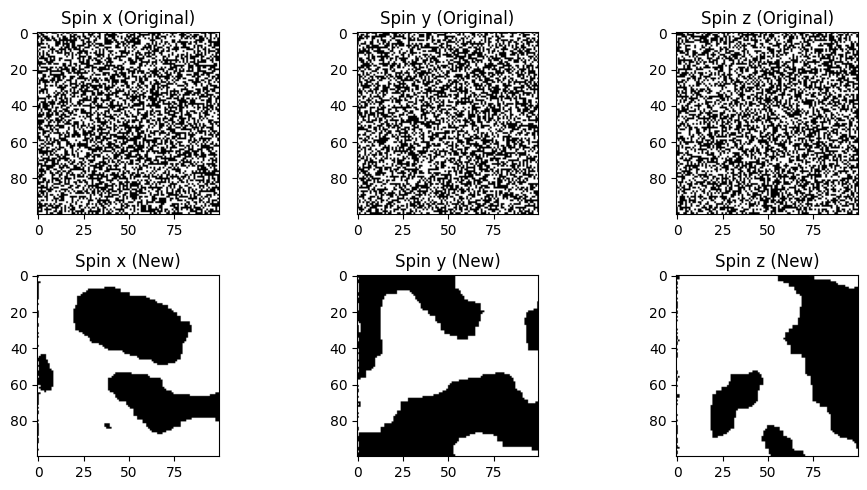

In [11]:
def plot_lattices2(spin_matrices, spin_matrices_new, figsize=(12, 8)):
    fig, axes = plt.subplots(2, 3, figsize=figsize)
    labels = ['x', 'y', 'z']
    
    # Plot spin_matrices in the first row
    for i in range(3):
        lattice = spin_matrices[i, :, :]
        binary_lattice = (lattice + 1) // 2  # Convert -1 and 1 to 0 and 1
        axes[0, i].imshow(binary_lattice, cmap="binary", origin="upper")
        axes[0, i].set_title(f"Spin {labels[i]} (Original)")
        axes[0, i].axis("on")
    
    # Plot spin_matrices_new in the second row
    for i in range(3):
        lattice_new = spin_matrices_new[i, :, :]
        binary_lattice_new = (lattice_new + 1) // 2
        axes[1, i].imshow(binary_lattice_new, cmap="binary", origin="upper")
        axes[1, i].set_title(f"Spin {labels[i]} (New)")
        axes[1, i].axis("on")

    # Adjust layout
    plt.tight_layout()
    plt.show()
plot_lattices2(spin_matrices, spin_matrices_new, figsize=(10, 5))